In [14]:
import os
from datetime import datetime
from datetime import date
import pandas_datareader.data as web
import pandas as pd
import numpy as np
import excelCol
import matplotlib.pyplot as plt
%matplotlib inline

#### Input Data for Program


In [3]:
labels = ['AAPL', 'FB', 'MSFT']
start_date = '2013-2-01'
end_date = date.today()

In [4]:
#Get Data for tickers
ticker_info ={}
for i, j in zip(labels, range(len(labels))):
       ticker_info[j] = web.DataReader(i, "av-daily-adjusted", start=datetime(2017, 2, 9),end=datetime(2020, 3, 31),api_key='64WDJQ42PC1EKNEF')

    

In [5]:
# Merge Data frames with only adjusted close price for tickers
df = pd.DataFrame(ticker_info[0]['adjusted close'])
for key in ticker_info.keys():
    if key != 0:
        df = df.merge(ticker_info[key]['adjusted close'], left_index = True, right_index = True) 


In [6]:
# Assign the columns names to ticker names
df.columns = [labels]
df.index = pd.to_datetime(df.index)

In [7]:
df = df.resample('M').ffill().pct_change()

In [142]:
three_yr_ret = np.power(np.prod(1 + df.tail(36)), 12/36) -1
five_yr_ret = np.power(np.prod(1 + df.tail(60)), 12/60) -1
one_yr_ret = np.power(np.prod(1 + df.tail(12)), 12/12) -1

In [10]:
writer = pd.ExcelWriter('test.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1', startrow= 5, startcol=3)
# Get the xlsxwriter objects from the dataframe writer object.
workbook  = writer.book
worksheet = writer.sheets['Sheet1']

format1 = workbook.add_format({'num_format': '#,##0.00%'})
format2 = workbook.add_format({'num_format': '0%'})
worksheet.set_column(first_col=0, last_col=10, cell_format=format1)

chart1 = workbook.add_chart({'type': 'line'})  
chart1.add_series({  
    'name':       '=Sheet1!$E$6:$G$6',  
    'categories': '=Sheet1!$D$9:$D$20',  
    'values':     '=Sheet1!$E$9:$G$20',  
})  

# Add a chart title   
chart1.set_title ({'name': 'Results of data analysis'})  
    
# Add x-axis label  
chart1.set_x_axis({'name': 'Test number'})  
    
# Add y-axis label  
chart1.set_y_axis({'name': 'Data length (mm)'})  
    
# Set an Excel chart style.  
chart1.set_style(11)  
    
# add chart to the worksheet with given 
# offset values at the top-left corner of 
# a chart is anchored to cell D2 .   
worksheet.insert_chart('D2', chart1, {'x_offset': 25, 'y_offset': 10})  
    
    
writer.save()

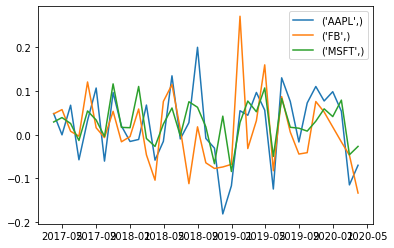

In [18]:
plt.plot(df)
plt.legend(df.columns)


In [13]:
from win32com.client import Dispatch
ex = Dispatch("Excel.Application")
ex.Visible = 1;
nwb = ex.WorkbookAdd()


AttributeError: Excel.Application.WorkbookAdd

In [168]:
from openpyxl.utils.dataframe import dataframe_to_rows
rows = dataframe_to_rows(df)



In [179]:
int('C')

ValueError: invalid literal for int() with base 10: 'C'

In [170]:
for r_idx, row in enumerate(rows, 1):
    for c_idx, value in enumerate(row, 1):
         sheet.cell(row=r_idx, column=c_idx, value=value)
    

AttributeError: 'NoneType' object has no attribute 'value'